<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 6: Support Vector Machines (SVM) ---
Data prepared: 140 training samples, 60 testing samples.

--- Step 2: Training Linear and RBF Kernels ---
Models trained.

--- Step 3: Visualizing Decision Boundaries (on training data) ---
Saved plot: /content/svm_with_linear_kernel.png
Displaying plot: SVM with Linear Kernel...


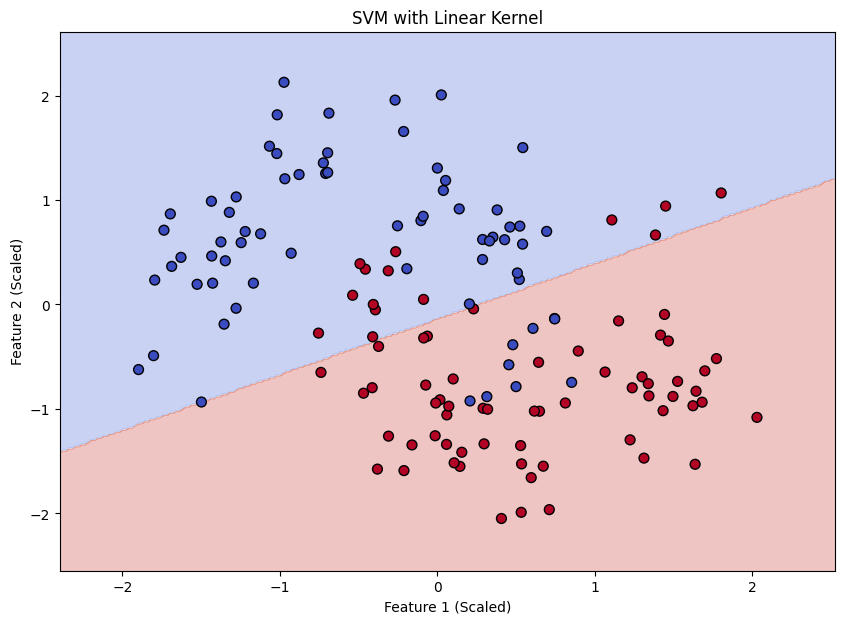

Saved plot: /content/svm_with_rbf_kernel_(defaults).png
Displaying plot: SVM with RBF Kernel (Defaults)...


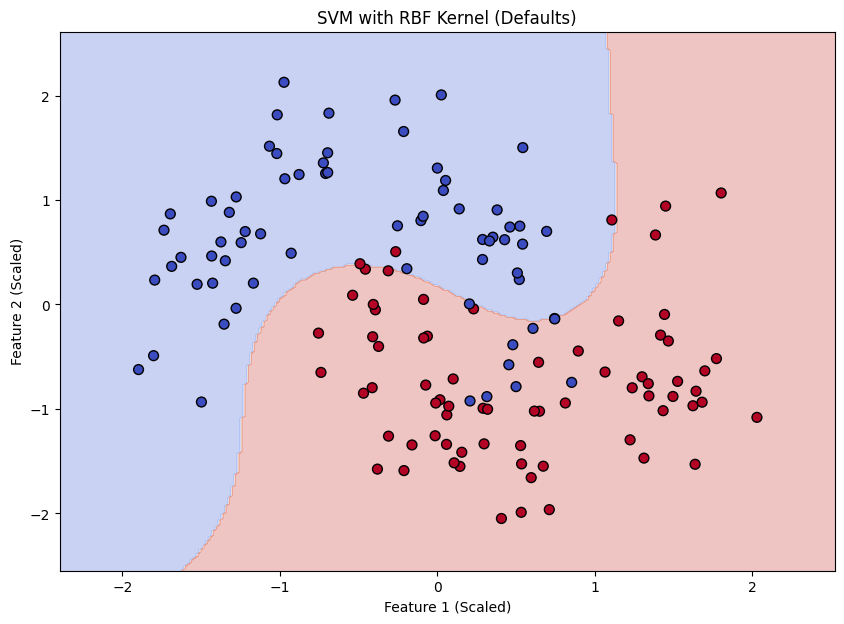


--- Step 4: Visualizing Hyperparameter Tuning ---
Saved plot: /content/rbf_svm:_low_c,_low_gamma_(underfit).png
Displaying plot: RBF SVM: Low C, Low gamma (Underfit)...


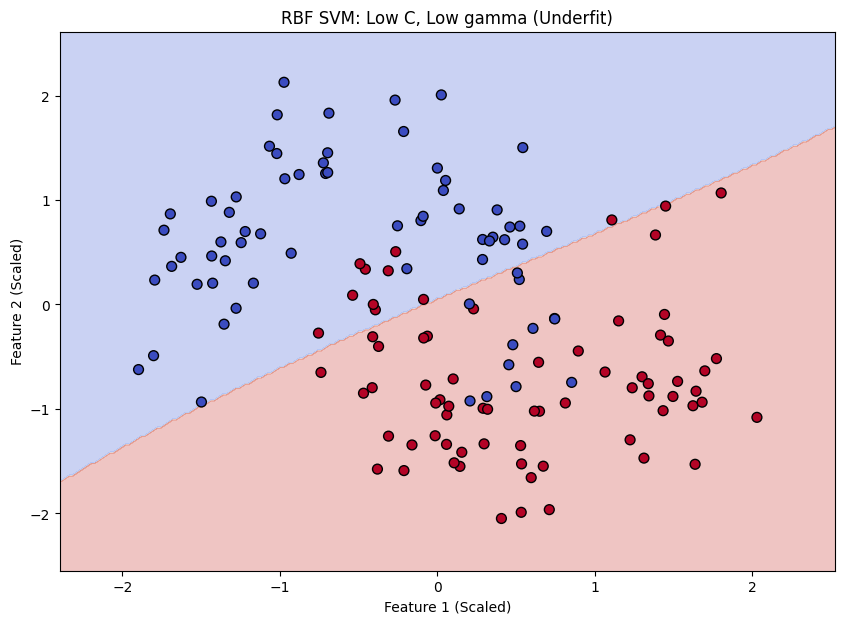

Saved plot: /content/rbf_svm:_high_c,_high_gamma_(overfit).png
Displaying plot: RBF SVM: High C, High gamma (Overfit)...


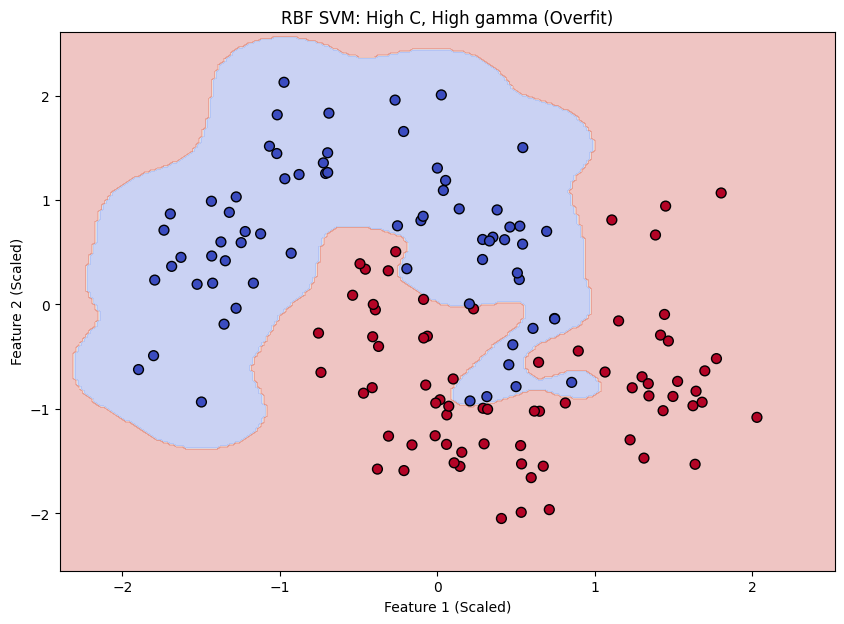

Hyperparameter effects visualized.

--- Step 5: Evaluating with Cross-Validation (GridSearchCV) ---
Running GridSearchCV (this may take a moment)...
GridSearchCV complete.

--- GridSearchCV Results ---
Best Parameters Found: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9450

--- Final Model Evaluation ---
Accuracy of Best Model on Test Set: 0.9500
Saved plot: /content/final_optimized_rbf_svm.png
Displaying plot: Final Optimized RBF SVM...


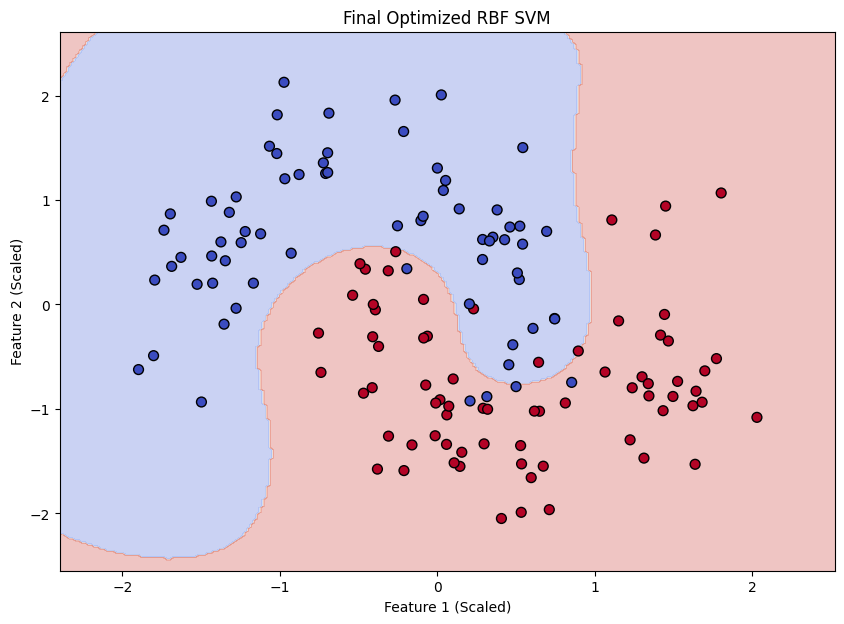


--- Task 6 Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import os

print("--- Task 6: Support Vector Machines (SVM) ---")

# --- 1. Load and Prepare Dataset ---
# We use 'make_moons' because it's a classic non-linear problem.
# We add noise to make it more realistic.
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

# SVMs are sensitive to feature scales. We MUST scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data for initial training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"Data prepared: {len(X_train)} training samples, {len(X_test)} testing samples.")

# Helper function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    """
    Plots the decision boundary for a trained classifier.
    """
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Get predictions for the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the data points
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1 (Scaled)")
    plt.ylabel("Feature 2 (Scaled)")

    # Save the plot
    filename = f"{title.replace(' ', '_').lower()}.png"
    plt.savefig(filename)
    print(f"Saved plot: {os.path.abspath(filename)}")
    print(f"Displaying plot: {title}...")
    plt.show() # <-- Display the plot
    plt.close()

# --- 2. Train SVM with Linear and RBF Kernels ---
print("\n--- Step 2: Training Linear and RBF Kernels ---")
# a) Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)

# b) RBF SVM (default parameters)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

print("Models trained.")

# --- 3. Visualize Decision Boundary ---
print("\n--- Step 3: Visualizing Decision Boundaries (on training data) ---")
# Visualize Linear SVM
plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")

# Visualize RBF SVM
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel (Defaults)")

# --- 4. Tune Hyperparameters (C and gamma) ---
print("\n--- Step 4: Visualizing Hyperparameter Tuning ---")
# We'll show the effect of changing C and gamma

# a) Low C, Low gamma (Too general, underfit)
svm_underfit = SVC(kernel='rbf', C=0.1, gamma=0.1, random_state=42)
svm_underfit.fit(X_train, y_train)
plot_decision_boundary(svm_underfit, X_train, y_train, "RBF SVM: Low C, Low gamma (Underfit)")

# b) High C, High gamma (Too specific, overfit)
svm_overfit = SVC(kernel='rbf', C=100, gamma=10, random_state=42)
svm_overfit.fit(X_train, y_train)
plot_decision_boundary(svm_overfit, X_train, y_train, "RBF SVM: High C, High gamma (Overfit)")

print("Hyperparameter effects visualized.")

# --- 5. Use Cross-Validation (GridSearchCV) to Evaluate ---
print("\n--- Step 5: Evaluating with Cross-Validation (GridSearchCV) ---")
# This is the *correct* way to find the best hyperparameters.
# We will search a "grid" of C and gamma values.

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'gamma': [0.01, 0.1, 1, 10],   # Kernel "reach"
    'kernel': ['rbf']               # We are tuning the RBF kernel
}

# Set up GridSearchCV with 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Running GridSearchCV (this may take a moment)...")
# We use the *full scaled dataset* for a robust CV
grid_search.fit(X_scaled, y)

print("GridSearchCV complete.")

# Print the results
print("\n--- GridSearchCV Results ---")
print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Finally, let's train the "best" model on the full training set
# and evaluate it on the test set
print("\n--- Final Model Evaluation ---")
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train) # Re-fit on our training split
y_pred = best_svm.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of Best Model on Test Set: {final_accuracy:.4f}")

# Visualize the final, optimized model
plot_decision_boundary(best_svm, X_train, y_train, "Final Optimized RBF SVM")

#print("\n--- Task 6 Complete ---")